IMAGE PREPROCESSING

In [9]:
!pip install keras==2.2.4

  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.2.4 which is incompatible.


In [5]:
pwd

'C:\\Users\\BIS\\Downloads'

In [10]:
!pip install watson-machine-learning-client

  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73929 sha256=676e6ad480dc078659fb10fe43725947769a62756e0934210bb356d2e8bbef5d
  Stored in directory: c:\users\bis\appdata\local\pip\cache\wheels\31\8c\e6\9bd830e254449a64d3e3c8a79da6fb6bc940a19b165d76c3c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562963 sha256=62b77248df13532d1c34b3aaa830f610579f9197b13ff524730dc70aa9fe00b1
  Stored in directory: c:\users\bis\appdata\local\pip\cache\wheels\e4\4c\9e\97ee8774f14cbfb9aa69201a58056b1e1379123dfbdbedc24e
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.12.0-py3-none-any.whl size=89779 sha256=16293bd62397f6604cc28f08dfda2475bcaba1e5cfa75266eeacb8f07849e9ab
  Stored in directory: c:\users\bis\appdata\local\pip\cache\wheels\4f\8b\ce\0d93b358521705de3f110de4356db2b820551ea009c865e4bd
Successfully built ibm-cos-sdk ibm-cos-sdk-core ibm-cos-sdk-s3transfer
  Attempting uninstall: urllib3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KRpFN9M1daS2C53Gy1JCSm4oyvZoF5zMazE9NmyaXBjQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'arrhythmiaheart-donotdelete-pr-4yrjubrx5lcsk3'
object_key = 'Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [ ]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [18]:
ls

data/


Importing the ImageDataGenerator Library

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Configuring ImageDataGenerator Class

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,vertical_flip=True,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator Functionality To Trainset And Testset

In [22]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/data/train",target_size=(64,64),class_mode= "categorical" ,batch_size=128)

Found 15341 images belonging to 6 classes.


In [23]:
x_test=test_data.flow_from_directory(r"/home/wsuser/work/data/test",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 6825 images belonging to 6 classes.


In [24]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

MODEL BUILDING

Importing The Libraries

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Conv2D

In [26]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D

Initialising The Model

In [27]:
model=Sequential()

Adding CNN Layers

In [28]:
model.add(Conv2D(32,(3,3),activation='relu',strides=(1,1),input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))


In [29]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [30]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

Adding Dense Layers

Hidden Layer

In [31]:
model.add(Dense(500,activation = "relu"))

In [32]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [33]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [34]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [35]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

Output Layer

In [36]:
model.add(Dense(6,activation = "softmax"))

In [37]:
model.add(Dense(units = 6,kernel_initializer = "random_uniform",activation = "softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 500)               3

Configuring The Learning Process

In [39]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
len(x_train)

120

Training The Model

In [42]:
model.fit(x_train,epochs=2,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/2
120/120 [==============================] - 41s 336ms/step - loss: 1.7157 - accuracy: 0.4591 - val_loss: 1.7278 - val_accuracy: 0.3193
Epoch 2/2
120/120 [==============================] - 41s 339ms/step - loss: 1.6074 - accuracy: 0.4788 - val_loss: 1.6911 - val_accuracy: 0.3193


In [43]:
model.fit(x_train,epochs=2,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/2
120/120 [==============================] - 40s 333ms/step - loss: 1.5374 - accuracy: 0.4788 - val_loss: 1.6725 - val_accuracy: 0.3193
Epoch 2/2
120/120 [==============================] - 40s 335ms/step - loss: 1.4939 - accuracy: 0.4788 - val_loss: 1.6642 - val_accuracy: 0.3193


In [44]:
model.fit(x_train,epochs=2,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/2
120/120 [==============================] - 40s 330ms/step - loss: 1.4674 - accuracy: 0.4788 - val_loss: 1.6618 - val_accuracy: 0.3193
Epoch 2/2
120/120 [==============================] - 40s 334ms/step - loss: 1.4514 - accuracy: 0.4788 - val_loss: 1.6626 - val_accuracy: 0.3193


In [45]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=2)

/tmp/wsuser/ipykernel_165/3534702751.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=2)


Epoch 1/2
120/120 [==============================] - 40s 333ms/step - loss: 1.4416 - accuracy: 0.4788 - val_loss: 1.6623 - val_accuracy: 0.3193
Epoch 2/2
120/120 [==============================] - 39s 322ms/step - loss: 1.4356 - accuracy: 0.4788 - val_loss: 1.6617 - val_accuracy: 0.3193


**SAVE THE MODEL**

#\####Saving The Model`

In [46]:
model.save('ECG.h5')

Testing The Model

In [49]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [50]:
model=load_model('ECG.h5')

In [52]:
img=image.load_img("/home/wsuser/work/data/test/Normal/fig_2137.png",target_size=(64,64))

In [53]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

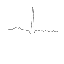

In [ ]:
img

In [54]:
import numpy as np


In [55]:
x = np.expand_dims(x,axis = 0)
pred = model.predict(x)

In [56]:
y_pred=np.argmax(pred)
y_pred

1

In [57]:
index=['left Bundle Branch block',
       'Normal',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Ventricular Fibrillation']

In [58]:
result = str(index[y_pred])
result

'Normal'

In [71]:
!tar -zcvf Arrhythmia-heart-model.tgz ECG.h5

ECG.h5


In [3]:
!pip install keras==2.2.4

In [47]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 20.2 MB/s eta 0:00:01


In [4]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"pOPcgH6uLkr2yE_7-lSsC20vuzTtk9c7411Oj3KbPUe9"
}

client=APIClient(wml_credentials)

ModuleNotFoundError: No module named 'ibm_watson_machine_learning'

In [5]:
client

NameError: name 'client' is not defined

In [6]:
def guid_space_name(client,animal_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==animal_deploy)['metadata']['id'])

In [7]:
space_uid=guid_space_name(client,'Arrhythmia-heart')
print("Space UID "+space_uid)

NameError: name 'client' is not defined

In [8]:
client.set.default_space(space_uid)

NameError: name 'client' is not defined

In [64]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [65]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [66]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [67]:
ls

data/  ECG.h5


In [72]:
model_details=client.repository.store_model(model='Arrhythmia-heart-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [74]:
model_id=client.repository.get_model_id(model_details)

In [75]:
model_id

'229fdf1d-c264-43b9-8725-bfa9d251f570'

In [2]:
client.repository.download('229fdf1d-c264-43b9-8725-bfa9d251f570','heart.tar.gb')

NameError: name 'client' is not defined

In [77]:
ls

Arrhythmia-heart-model.tgz  Classification  data/  ECG.h5  heart.tar.gb
